<a href="https://colab.research.google.com/github/nithin-4884/collage/blob/main/DL_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training with SGD
Epoch 1/10 - SGD loss: 27.6170
Epoch 2/10 - SGD loss: 14.8912
Epoch 3/10 - SGD loss: 12.9660
Epoch 4/10 - SGD loss: 12.4426
Epoch 5/10 - SGD loss: 11.2319
Epoch 6/10 - SGD loss: 10.2022
Epoch 7/10 - SGD loss: 9.9263
Epoch 8/10 - SGD loss: 10.0289
Epoch 9/10 - SGD loss: 10.3952
Epoch 10/10 - SGD loss: 8.2054

Training with Adam
Epoch 1/10 - Adam loss: 65.6874
Epoch 2/10 - Adam loss: 17.4175
Epoch 3/10 - Adam loss: 16.5671
Epoch 4/10 - Adam loss: 15.2209
Epoch 5/10 - Adam loss: 14.2123
Epoch 6/10 - Adam loss: 13.5604
Epoch 7/10 - Adam loss: 12.5718
Epoch 8/10 - Adam loss: 11.3959
Epoch 9/10 - Adam loss: 12.0174
Epoch 10/10 - Adam loss: 11.3298

Test Loss with SGD: 3.9522
Test Loss with Adam: 4.2470


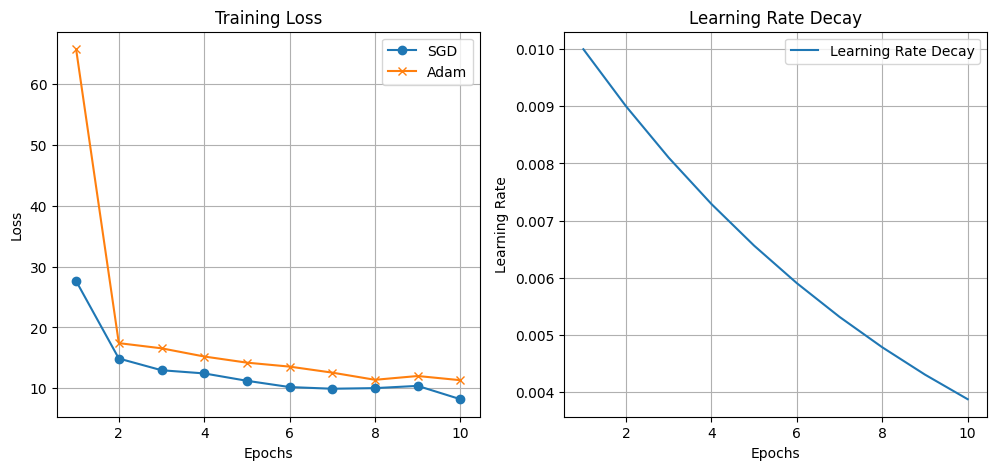

In [ ]:
#2nd assignment

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# 1. Create synthetic data
def create_data():
    x = np.random.randn(1000, 10)
    y = np.sum(x**2, axis=1, keepdims=True) + np.random.randn(1000, 1) * 0.1  # Non-linear relationship with noise
    return x, y

# 2. Define a model with dropout layers
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dropout(0.3),
        layers.Dense(20, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1)
    ])
    return model

# 3. Train model with history recording and early stopping
def train_model_with_history(model, optimizer, x, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mse')
    history = []

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)

    # Learning rate scheduler callback
    lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.9)  # Reduces learning rate by 10% each epoch

    for epoch in range(epochs):
        hist = model.fit(x, y, batch_size=batch_size, epochs=1, verbose=0, callbacks=[early_stopping, lr_scheduler])
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} loss: {loss:.4f}")
    return history

# 4. Compare performance of Adam and SGD optimizers
x, y = create_data()
model_sgd = create_model()
model_adam = create_model()
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.01)

epochs = 10
batch_size = 32

print("\nTraining with SGD")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, x, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam")
adam_loss = train_model_with_history(model_adam, optimizer_adam, x, y, batch_size, epochs, 'Adam')

# 5. Evaluate on test data
x_test, y_test = create_data()
sgd_test_loss = model_sgd.evaluate(x_test, y_test, verbose=0)
adam_test_loss = model_adam.evaluate(x_test, y_test, verbose=0)

print(f"\nTest Loss with SGD: {sgd_test_loss:.4f}")
print(f"Test Loss with Adam: {adam_test_loss:.4f}")

# 6. Plot training loss and learning rate decay
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', marker='o')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title("Training Loss")

# Plot learning rate decay
lr_schedule = [0.01 * (0.9 ** epoch) for epoch in range(epochs)]
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), lr_schedule, label='Learning Rate Decay')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.title("Learning Rate Decay")

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.7179 - loss: 0.8432 - val_accuracy: 0.9849 - val_loss: 0.0446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9495 - loss: 0.1701 - val_accuracy: 0.9901 - val_loss: 0.0325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9641 - loss: 0.1232 - val_accuracy: 0.9911 - val_loss: 0.0257
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9691 - loss: 0.1023 - val_accuracy: 0.9925 - val_loss: 0.0253
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9731 - loss: 0.0916 - val_accuracy: 0.9941 - val_loss: 0.0205
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0245
Test accuracy: 0.9940999746322632


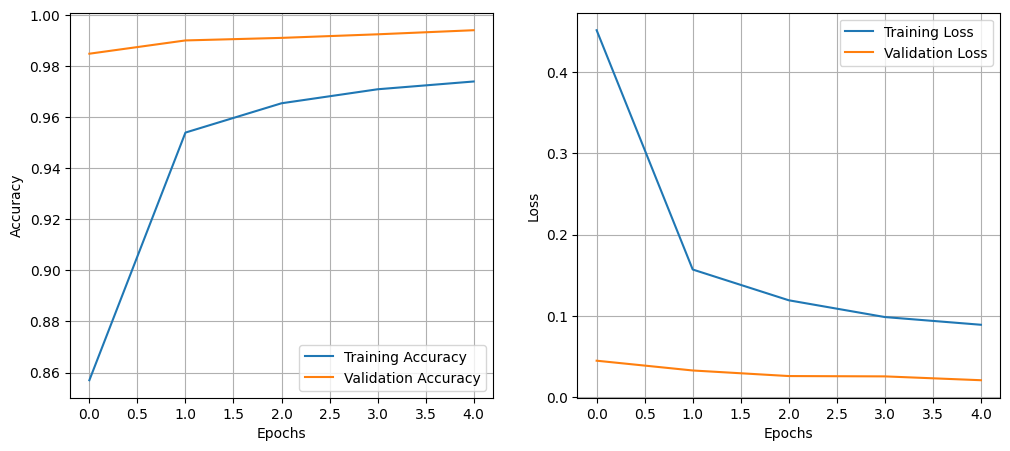

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(train_images)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
]

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=5, validation_data=(test_images, test_labels),
                    callbacks=callbacks)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
